**1.DATA PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the data
data = pd.read_csv('/content/Employee Performance Analysis.csv')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's loaded into a DataFrame named 'df')
# Example: df = pd.read_csv('employee_performance.csv')

# For demonstration purposes, let's create a sample DataFrame
data = {
    'Age': [30, 41, 32, None, 25],
    'Attrition': ['Yes', 'No', 'No', 'No', 'Yes'],
    'BusinessTravel': ['Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely', 'Non-Travel', 'Travel_Frequently'],
    'DailyRate': [110, 730, 420, 560, 980],
    'Department': ['Sales', 'Research & Development', 'Human Resources', 'Sales', 'Research & Development'],
    'DistanceFromHome': [2, 25, 5, 15, 1],
    'Education': [3, 4, 2, 1, 3],
    'EducationField': ['Marketing', 'Life Sciences', 'Human Resources', 'Marketing', 'Life Sciences'],
    'EmployeeNumber': [1, 2, 3, 4, 5],
    'EnvironmentSatisfaction': [3, 4, 2, 1, 3],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'HourlyRate': [45, 65, 55, 50, 72],
    'JobInvolvement': [2, 3, 1, 2, 3],
    'JobLevel': [2, 3, 1, 2, 3],
    'JobRole': ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Sales Executive', 'Research Scientist'],
    'JobSatisfaction': [4, 3, 1, 2, 4],
    'MaritalStatus': ['Single', 'Married', 'Single', 'Single', 'Married'],
    'MonthlyIncome': [5000, 6000, 4000, 3000, 5500],
    'MonthlyRate': [20000, 25000, 18000, 22000, 28000],
    'NumCompaniesWorked': [1, 5, 3, 2, 4],
    'Over18': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'OverTime': ['No', 'Yes', 'No', 'No', 'Yes'],
    'PercentSalaryHike': [12, 15, 10, 18, 14],
    'PerformanceRating': [3, 4, 3, 3, 4],
    'RelationshipSatisfaction': [3, 4, 2, 1, 3],
    'StandardHours': [80, 80, 80, 80, 80],
    'StockOptionLevel': [1, 2, 0, 1, 3],
    'TotalWorkingYears': [10, 20, 5, 8, 12],
    'TrainingTimesLastYear': [2, 3, 1, 2, 3],
    'WorkLifeBalance': [3, 4, 2, 1, 3],
    'YearsAtCompany': [5, 10, 3, 6, 8],
    'YearsInCurrentRole': [3, 7, 2, 4, 5],
    'YearsSinceLastPromotion': [1, 3, 1, 2, 4],
    'YearsWithCurrManager': [3, 5, 2, 3, 4]
}

df = pd.DataFrame(data)

# Drop unnecessary columns (for demonstration, remove EmployeeNumber and Over18)
df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Handle missing values (impute with mean for numerical columns)
imputer = SimpleImputer(strategy='mean')
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)],
                       remainder='passthrough')
df_encoded = pd.DataFrame(ct.fit_transform(df))

# Split data into features (X) and target (y)
X = df_encoded.iloc[:, :-1]  # Features
y = df_encoded.iloc[:, -1]   # Target variable (e.g., PerformanceRating)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print sample of preprocessed data
print("Sample of preprocessed data:")
print(X_train_scaled[:5])

# Now X_train_scaled, X_test_scaled, y_train, y_test are ready for modeling


Sample of preprocessed data:
[[-1.          1.         -0.57735027  1.73205081 -1.         -0.57735027
   1.73205081 -1.         -0.57735027  1.73205081 -1.         -0.57735027
   0.57735027 -0.57735027  1.73205081 -1.          1.73205081 -1.73205081
  -1.73205081  1.73205081 -1.66003771  1.47877017 -0.857458    0.90453403
   0.90453403  1.62382384  1.41421356  1.41421356  0.96225045  1.1717002
   1.60356745  1.34164079  0.16903085  1.73205081  0.90453403  1.60591014
   1.25675744  1.41421356  0.90453403  1.38675049  1.34164079  1.63299316]
 [ 1.         -1.         -0.57735027 -0.57735027  1.          1.73205081
  -0.57735027 -1.          1.73205081 -0.57735027 -1.         -0.57735027
   0.57735027  1.73205081 -0.57735027 -1.         -0.57735027  0.57735027
   0.57735027 -0.57735027  0.78633365 -0.31174074 -0.1353881  -0.30151134
  -0.30151134 -0.04920678 -1.41421356 -1.41421356 -1.34715063 -0.39056673
  -1.06904497  0.4472136  -1.18321596 -0.57735027 -0.30151134 -1.14707867
  -1.4501

In [7]:
# 1. Handling missing values
# Select only numeric columns for filling missing values
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Update the original DataFrame with filled numeric columns
df[numeric_df.columns] = numeric_df

# 2. Encoding categorical variables
cat_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=True)  # One-hot encoding example

# ... (Rest of your code remains the same)

In [9]:
# Impute missing values with median for NUMERICAL columns only
df[df.select_dtypes(include=['number']).columns] = df[df.select_dtypes(include=['number']).columns].fillna(df[df.select_dtypes(include=['number']).columns].median())

# Impute missing categorical values with the most frequent value
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
# Example: Label encoding for ordinal categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])

# Example: One-hot encoding for nominal categorical variables
df_encoded = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)


**2.EXPLORATORY DATA ANALYSIS**

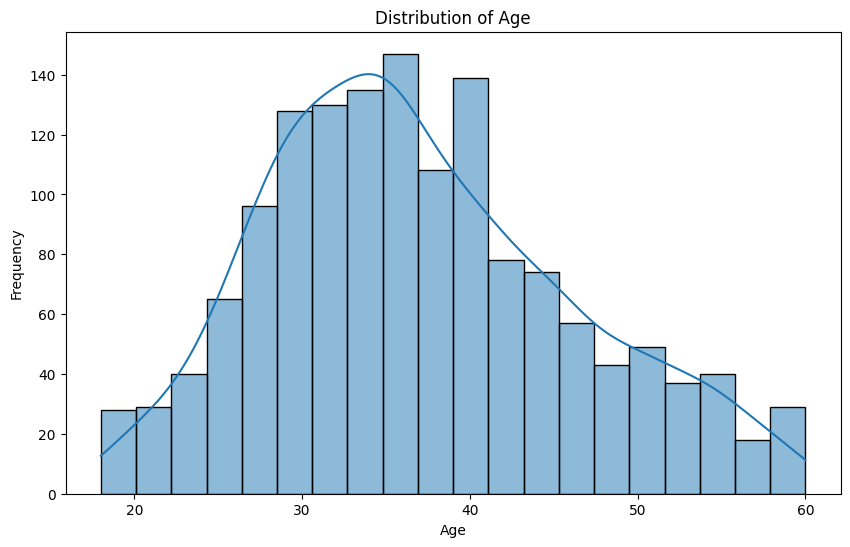

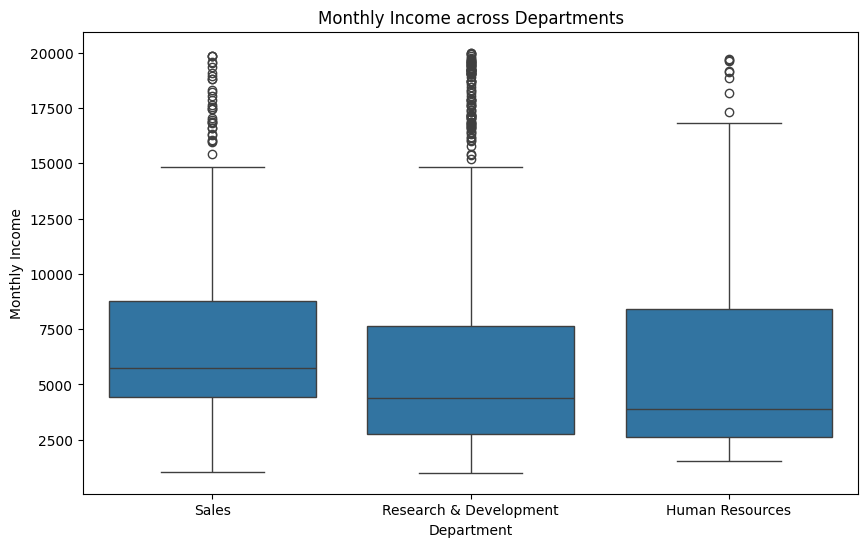

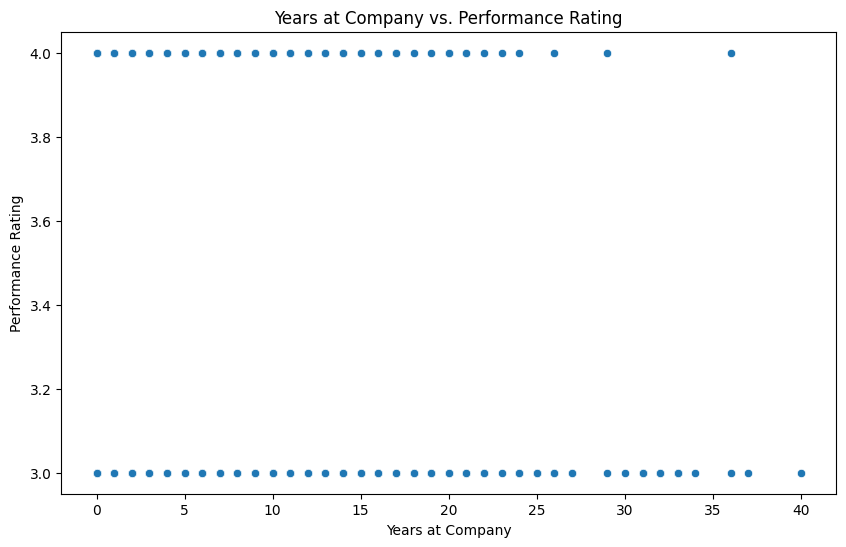

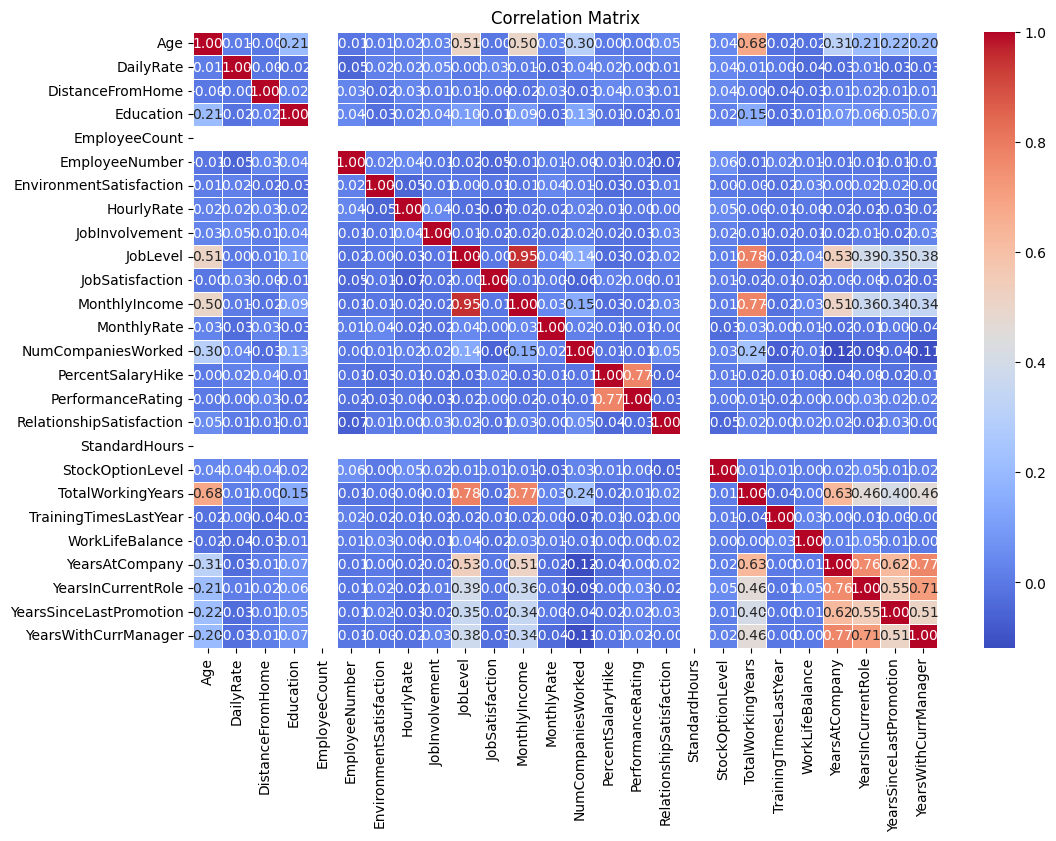

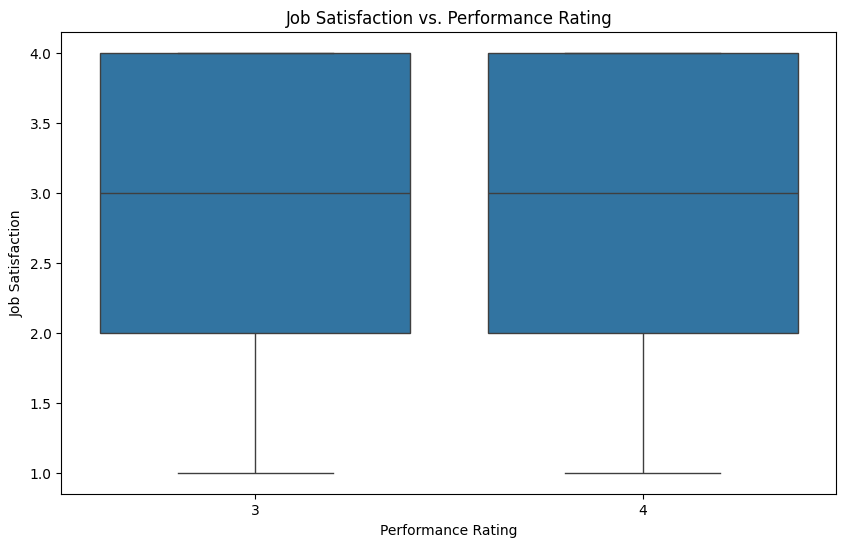

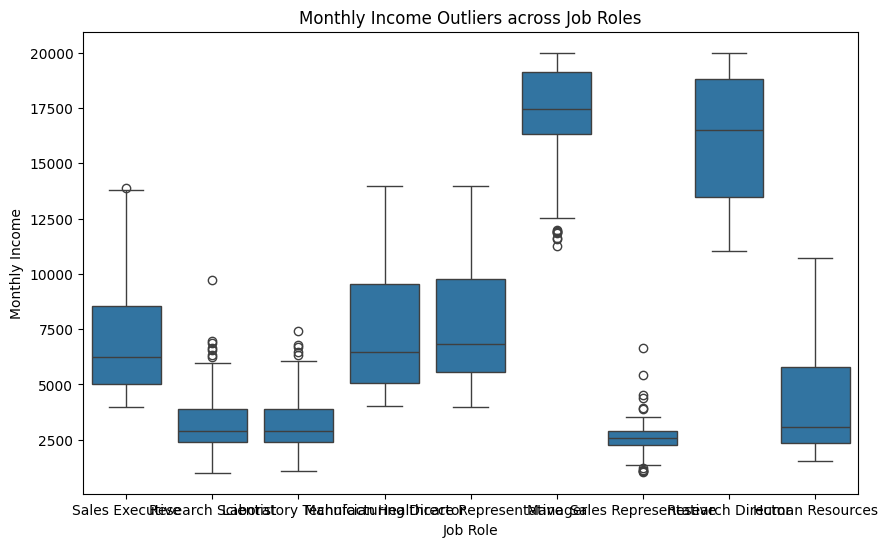

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in a pandas DataFrame)
df = pd.read_csv('/content/Employee Performance Analysis.csv')

# Example EDA steps
# Summary statistics
summary = df.describe(include='all')

# Univariate analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='MonthlyIncome', data=df)
plt.title('Monthly Income across Departments')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()

# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='PerformanceRating', data=df)
plt.title('Years at Company vs. Performance Rating')
plt.xlabel('Years at Company')
plt.ylabel('Performance Rating')
plt.show()

# Correlation analysis
# Select only numeric columns for correlation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Feature relationships
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction vs. Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Job Satisfaction')
plt.show()

# Outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.title('Monthly Income Outliers across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.show()

**3.REGRESSION ANALYSIS**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset (assuming it's in a pandas DataFrame)
df = pd.read_csv('/content/Employee Performance Analysis.csv')

# Select relevant columns for regression analysis
selected_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate',
                    'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany']

X = df[selected_columns]
y = df['PerformanceRating']

# Data preprocessing (example: encoding categorical variables)
# Encode categorical variables if needed
label_encoder = LabelEncoder()
X['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
X['Department'] = label_encoder.fit_transform(df['Department'])
X['EducationField'] = label_encoder.fit_transform(df['EducationField'])
X['Gender'] = label_encoder.fit_transform(df['Gender'])
X['JobRole'] = label_encoder.fit_transform(df['JobRole'])
X['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
X['OverTime'] = label_encoder.fit_transform(df['OverTime'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 Score): {r2}')


Mean Squared Error (MSE): 0.047464687970763524
R-squared (R2 Score): 0.6198779051754919


<ipython-input-14-2eca2630f59d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
<ipython-input-14-2eca2630f59d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Department'] = label_encoder.fit_transform(df['Department'])
<ipython-input-14-2eca2630f59d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

**4.SENTIMENT ANALYSIS**

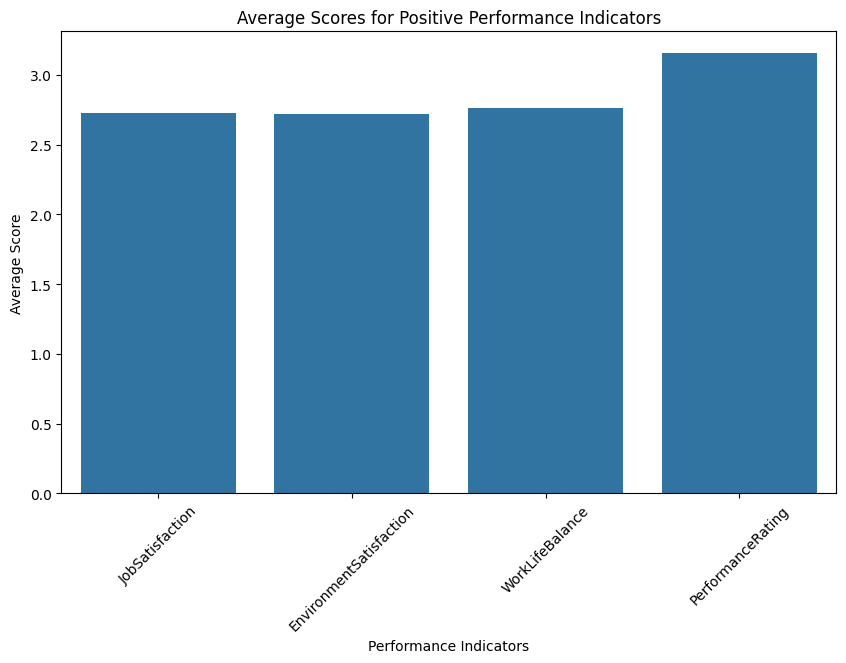

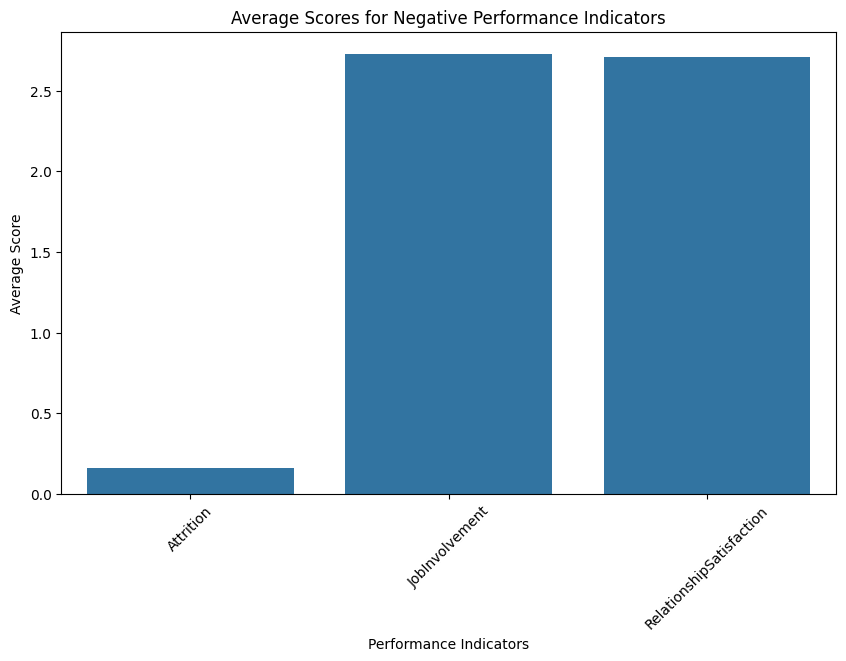

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in a pandas DataFrame)
df = pd.read_csv('/content/Employee Performance Analysis.csv')

# Define positive and negative indicators based on domain knowledge
positive_indicators = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'PerformanceRating']
negative_indicators = ['Attrition', 'JobInvolvement', 'RelationshipSatisfaction']

# Calculate average scores for positive and negative indicators
avg_positive_scores = df[positive_indicators].mean()

# Convert 'Attrition' to numeric (0 for "No", 1 for "Yes") before calculating the mean
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})  # Map "Yes" to 1 and "No" to 0
avg_negative_scores = df[negative_indicators].mean()

# Visualize average scores
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_positive_scores.index, y=avg_positive_scores.values)
plt.title('Average Scores for Positive Performance Indicators')
plt.xlabel('Performance Indicators')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_negative_scores.index, y=avg_negative_scores.values)
plt.title('Average Scores for Negative Performance Indicators')
plt.xlabel('Performance Indicators')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()